# simple linear regression
1. Execute cell -> shift + Enter
2. convert cell to code - esc,y
3. convert cell to markdown -> esc,m

In [35]:
from warnings import filterwarnings

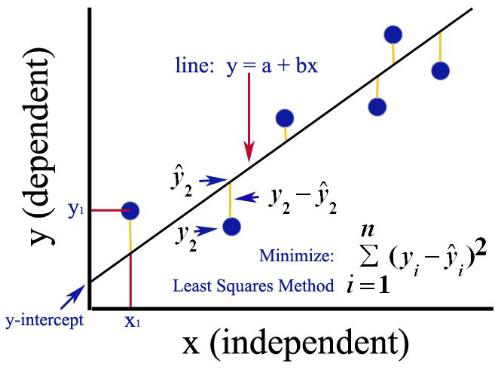

# fro 50 starups data estimate the profit

# step 1 - Data ingestion

In [8]:
import pandas as pd 

In [10]:
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


- Target profit

# step 2 - Basec data quality 
1. info - df.info()
2. Duplicate - df.duplicated().sum()
3. missing df.isna().sum()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [12]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

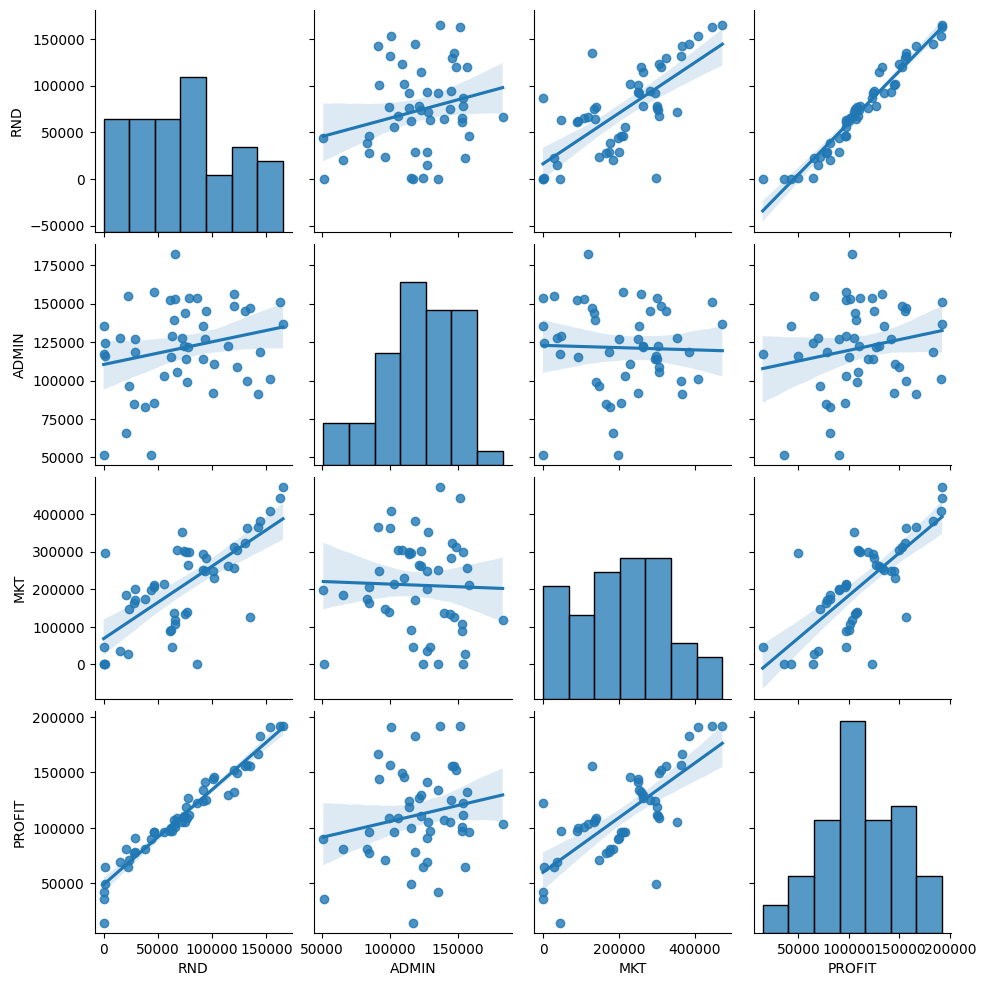

In [14]:
import seaborn as sns
sns.pairplot(data=df, kind="reg")

In [16]:
df.corr(numeric_only=True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


# RNDD should be predictor for Profit
# profit ~ RND
# Profit(y) = B0 + B1 * RND(X)
# STEP 3  Seperate X(RND), Y(PROFIT)

In [19]:
X = df[["RND"]]
Y = df["PROFIT"]

In [20]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [21]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

# Step 4 - Train the model 

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()
model.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
model.intercept_

np.float64(49032.89914125215)

In [25]:
model.coef_

array([0.85429137])

# Profit_pred = 49032.9 + 0.8543 * RND

# step 5 - Evaluate the model

In [26]:
# R2 score
model.score(X,Y)

0.9465353160804393

In [27]:
ypred = model.predict(X)
ypred[0:5]

array([190289.29389289, 187938.71118575, 180116.65707807, 172369.00320589,
       170433.97345032])

In [28]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [29]:
from sklearn.metrics import(
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

def evaluate_model(model,x,y):
    ypred=model.predict(x)
    rmse = root_mean_squared_error(y,ypred)
    mae = mean_absolute_error(y,ypred)
    mape = mean_absolute_percentage_error(y,ypred)
    r2= r2_score(y,ypred)
    print(f'RMSE : {rmse: 2f}')
    print(f"MAE : { mae : 2f}")
    print(f"MAPE : {mape : 2%}")
    print(f"R2 : {r2 : 2%}")

In [31]:
evaluate_model(model,X,Y)

RMSE :  9226.100548
MAE :  6910.984355
MAPE :  11.070141%
R2 :  94.653532%


<Axes: xlabel='RND', ylabel='PROFIT'>

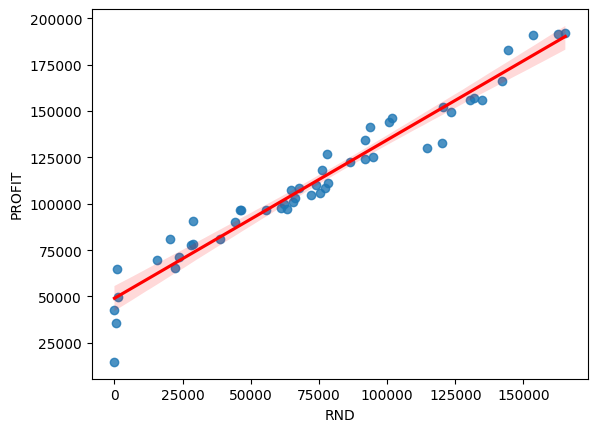

In [32]:
sns.regplot(data = df, x= "RND", y="PROFIT" , line_kws={"color": "red"})

# step 6 - Out of sample Prediction (Inference)

In [37]:
rnd = 60_000
profit = model.predict([[rnd]])
print(profit)

[100290.38139758]


d:\Machine_Learnig\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
